In [ ]:
# Purely Real Cosine RFFT

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import get_window
from scipy.fft import fft, fftfreq, rfft, rfftfreq, fftshift

# Parameters
fs = 1000  # Sampling frequency
pad_width = 2**13
# pad_width = 0

# Generate cosine wave
t_max = 50
x = np.linspace(0, t_max, (t_max * fs) + 1)
freq1 = 10.01
freq2=15 
x = np.cos(2 * np.pi * freq1 * x + np.pi / 2) + np.cos(2 * np.pi * freq2 * x + np.pi / 2)

win_type = 'boxcar'
N = len(x)
print(N)
window = get_window(win_type, N)

x = x * window

# Zero-padding (adding zeros on either side)
zero_padded_cosine = np.pad(x, pad_width)  # Pad with zeros to N_padded length
zero_padded_boxcar = np.pad(window, pad_width)
N_padded = len(zero_padded_cosine)

cosine_ft_centered = rfft(fftshift(zero_padded_cosine))
cosine_ft = rfft(zero_padded_cosine)
mags_centered = np.abs(cosine_ft_centered)
phases_centered = np.angle(cosine_ft_centered)
mags = np.abs(cosine_ft)
phases = np.angle(cosine_ft)

# Compute the Fourier Transform of the zero-padded windows
boxcar_ft = fft(zero_padded_boxcar)
boxcar_mags = np.abs(boxcar_ft)
boxcar_phases = np.angle(boxcar_ft)

boxcar_ft_centered = fft(fftshift(zero_padded_boxcar))
boxcar_mags_centered = np.abs(boxcar_ft_centered)
boxcar_phases_centered = np.angle(boxcar_ft_centered)



# Frequency axis (both positive and negative frequencies)
f = rfftfreq(N_padded, 1/fs)  # Frequency axis
f_window = fftfreq(N_padded, 1/fs)

# Plot the magnitude and phase of the Fourier Transforms
plt.figure(figsize=(10, 8))

width = 1  # Frequency range for zooming in

freq = (freq1 + freq2) / 2

plt.subplot(3, 2, 1)
plt.scatter(f, mags, s=10, label='Uncentered')
plt.scatter(f, mags_centered, s=1, label='Centered')
plt.title('Magnitude of Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(freq-width, freq+width)
plt.legend()

plt.subplot(3, 2, 2)
plt.scatter(f, phases, s=10, label='Uncentered')
plt.scatter(f, phases_centered, s=1, label='Centered')
plt.title('Phase of Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phases')
plt.xlim(freq-width, freq+width)
plt.legend()

# Boxcar window - Magnitude
plt.subplot(3, 2, 3)
plt.scatter(f_window, boxcar_mags, s=10, label='Uncentered')
plt.scatter(f_window, boxcar_mags_centered, s=1, label='Centered')
plt.title('Magnitude of Fourier Transform of Boxcar Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.xlim(-width, width)

# Boxcar window - Phase
plt.subplot(3, 2, 4)
plt.scatter(f_window, boxcar_phases, s=10, label='Uncentered')
plt.scatter(f_window, boxcar_phases_centered, s=1, label='Centered')
plt.title('Phase of Fourier Transform of Boxcar Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.legend()
plt.xlim(-width, width)

# # Cosine - Real part
plt.subplot(3, 2, 5)
plt.scatter(f, np.real(cosine_ft), s=10, label='Uncentered')
plt.scatter(f, np.real(cosine_ft_centered), s=1, label='Centered')
plt.title('Real part of Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Re(DFT)')
plt.xlim(freq-width, freq+width)
plt.legend()

# Boxcar window - real part
plt.subplot(3, 2, 6)
plt.scatter(f_window, np.real(boxcar_ft), s=10, label='Uncentered')
plt.scatter(f_window, np.real(boxcar_ft_centered), s=1, label='Centered')
plt.title('Real part of Fourier Transform of Boxcar Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Re(DFT)')
plt.legend()
plt.xlim(-width, width)






# Adjust spacing between subplots
plt.tight_layout(pad=3.0)

plt.show()



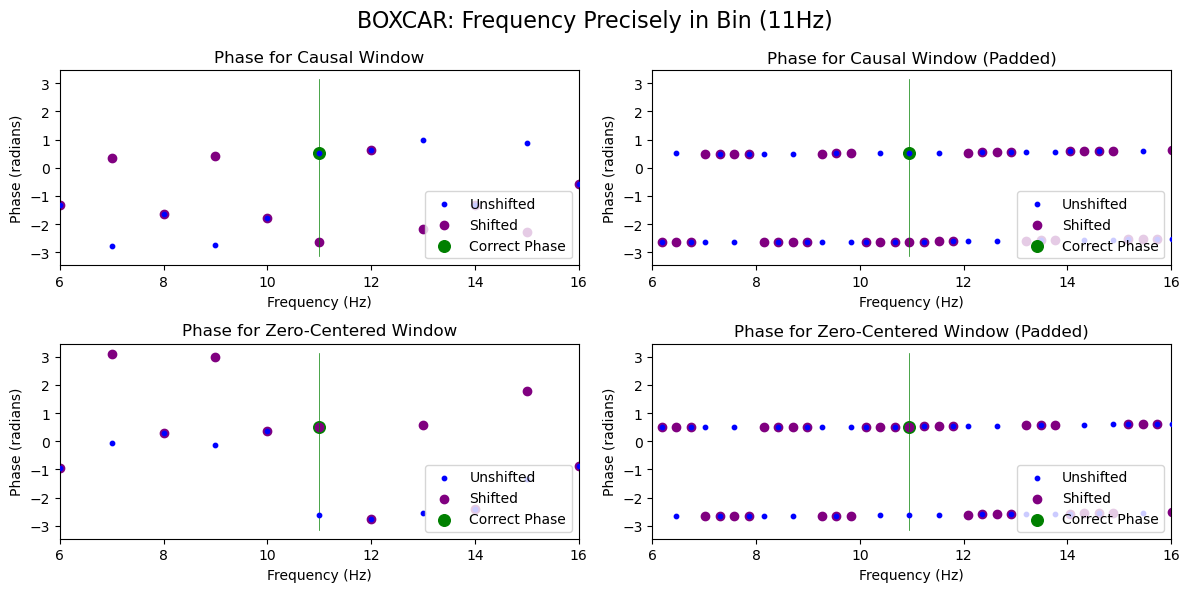

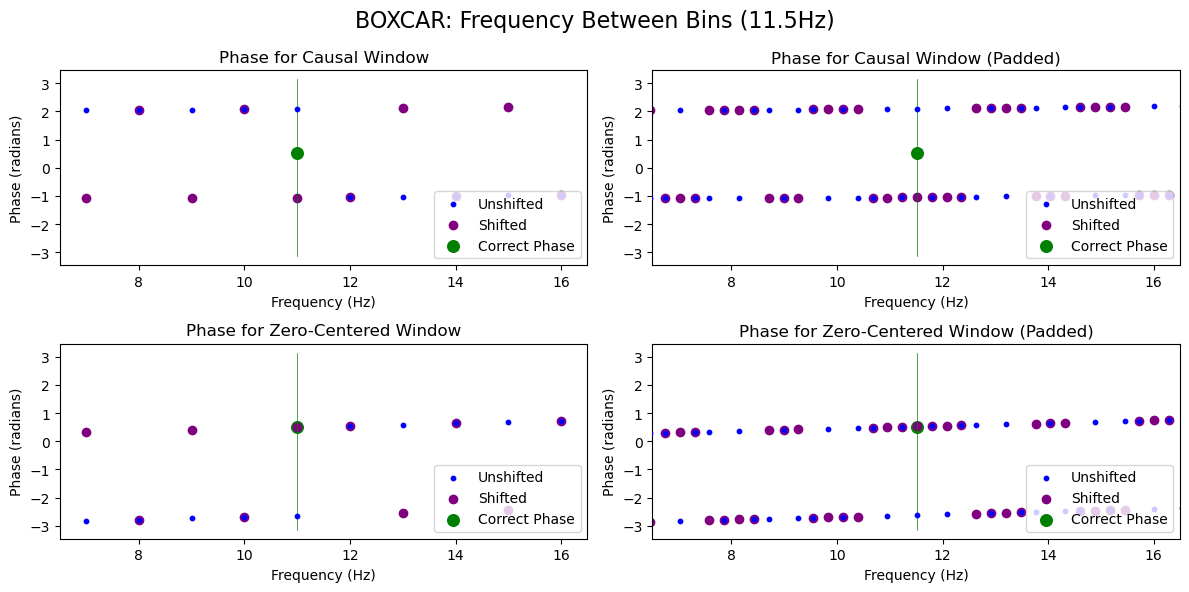

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sample_rate = 100  # Sample rate in Hz
duration = 1       # Duration in seconds (1 second to get 1 Hz bin width for unpadded)
phase = np.pi/6  # Phase shift in radians
for f0, f0_type in zip([11, 11.5], ['BOXCAR: Frequency Precisely in Bin (11Hz)', 'BOXCAR: Frequency Between Bins (11.5Hz)']):    # Frequency of the cosine wave in Hz

    # Time vector
    t_causal = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    t_zero_centered = np.linspace(-duration / 2, duration / 2, int(sample_rate * duration), endpoint=False)

    plt.figure(figsize=(12, 6))

    i = 1 # for subplots
    for t, start_time in zip([t_causal, t_zero_centered], ["Causal Window", "Zero-Centered Window"]):
        N = len(t)
        pad_amt = 2**7

        # window = np.hanning(N)
        window = np.ones(N)

        # Generate the cosine wave
        x = window*np.cos(2 * np.pi * f0 * t + phase)
        x_padded = np.pad(x, pad_amt)

        N_padded = len(x_padded)

        # Compute the DFTs
        dft = np.fft.fft(x)
        dft_shifted = np.fft.fft(np.fft.fftshift(x))
        dft_padded = np.fft.fft(x_padded)
        dft_shifted_padded = np.fft.fft(np.fft.fftshift(x_padded))
        f = np.fft.fftfreq(N, 1/sample_rate)
        f_padded = np.fft.fftfreq(N_padded, 1/sample_rate)
        f0_idx = np.abs(f - f0).argmin()
        f0_idx_padded = np.abs(f_padded - f0).argmin()
        
        width = 5 # Half width of frequency range

        # Plot the various phases of the DFT
        plt.subplot(2, 2, i)
        plt.scatter(f, np.angle(dft), label='Unshifted', s=10, zorder=3, color='blue')
        plt.scatter(f, np.angle(dft_shifted), label='Shifted', color='purple', zorder=2)
        plt.scatter(f[f0_idx], phase, color='green', s=70, label='Correct Phase', zorder=1)
        plt.legend(loc='lower right')
        plt.plot([f[f0_idx], f[f0_idx]], [-np.pi, np.pi], color='green', lw=0.5, label='f0')
        plt.title(f'Phase for {start_time}')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Phase (radians)')
        plt.xlim(f0-width, f0+width)  

        plt.subplot(2, 2, i + 1)
        plt.scatter(f_padded, np.angle(dft_padded), label='Unshifted', s=10, color='blue', zorder=3)
        plt.scatter(f_padded, np.angle(dft_shifted_padded), label='Shifted', color='purple', zorder=2)
        plt.scatter(f_padded[f0_idx_padded], phase, color='green', s=70, label='Correct Phase', zorder=1)
        plt.legend(loc='lower right')
        plt.plot([f_padded[f0_idx_padded], f_padded[f0_idx_padded]], [-np.pi, np.pi], color='green', lw=0.5, label='f0')
        plt.title(f'Phase for {start_time} (Padded)')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Phase (radians)')
        plt.xlim(f0-width, f0+width)  
        i += 2 # for sublplots
    plt.suptitle(f0_type, fontsize=16)
    plt.tight_layout()
    plt.show()

In [51]:
import numpy as np
import matplotlib.pyplot as plt

for t_max in [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 10.5, 5, 5.5, 7.5, 8, 8.5, 8.2, 9.1]:
    sr = 1000
    t = np.arange(0, t_max, 1/sr)
    f0 = 10.5
    eps = 0.5
    basis_f = f0 + eps
    phi = np.pi/6
    x_in = np.cos(2*np.pi*f0*t + phi)
    x_basis = np.cos(2*np.pi*basis_f*t + phi)

    overlap_beginning = np.sum(x_in * x_basis) / len(t)


    t_middle = np.arange(-t_max/2, t_max/2, 1/sr)
    x_in_middle = np.cos(2*np.pi*f0*t_middle + phi)
    x_basis_middle = np.cos(2*np.pi*basis_f*t_middle + phi)

    overlap_middle = np.sum(x_in_middle * x_basis_middle) / len(t)

    print(f"t_max = {t_max}")
    # print("Beginning Alignment Overlap: ", overlap_beginning)
    # print("Middle Alignment Overlap: ", overlap_middle)

    if overlap_beginning > overlap_middle:
        print("The beginning alignement is better")
    else:
        print("The middle alignment is better")
        
        
    # plt.figure(figsize=(8, 6))
    # plt.plot(t, x_in, label='Input Sinusoid')
    # plt.plot(t, x_basis, label='Basis Sinusoid (Real Part)')    
    # plt.title("Lining Up Phases at Beginning")
    # plt.xlabel('Time')
    # plt.ylabel('Amplitude')
    # plt.legend(loc='lower right')
    # plt.show()


    # plt.figure(figsize=(8, 6))
    # plt.plot(t_middle, x_in_middle, label='Input Sinusoid')
    # plt.plot(t_middle, x_basis_middle, label='Basis Sinusoid (Real Part)')    
    # plt.title("Lining Up Phases in Middle")
    # plt.xlabel('Time')
    # plt.ylabel('Amplitude')
    # plt.legend(loc='lower right')
    # plt.show()


t_max = 1
The middle alignment is better
t_max = 1.5
The middle alignment is better
t_max = 2
The middle alignment is better
t_max = 2.5
The beginning alignement is better
t_max = 3
The beginning alignement is better
t_max = 3.5
The beginning alignement is better
t_max = 4
The beginning alignement is better
t_max = 4.5
The middle alignment is better
t_max = 10.5
The beginning alignement is better
t_max = 5
The middle alignment is better
t_max = 5.5
The middle alignment is better
t_max = 7.5
The beginning alignement is better
t_max = 8
The beginning alignement is better
t_max = 8.5
The middle alignment is better
t_max = 8.2
The middle alignment is better
t_max = 9.1
The middle alignment is better


t_max = 10.5
Beginning Alignment Overlap:  0.01981772594358324
Middle Alignment Overlap:  -0.023291337597048926
The beginning alignement is better


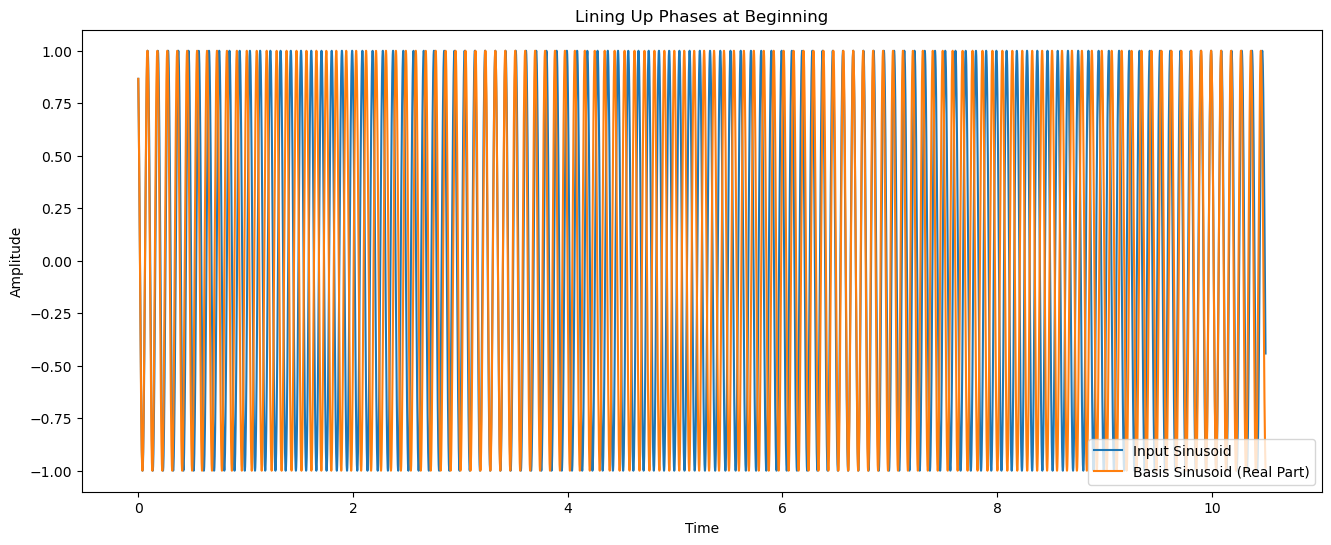

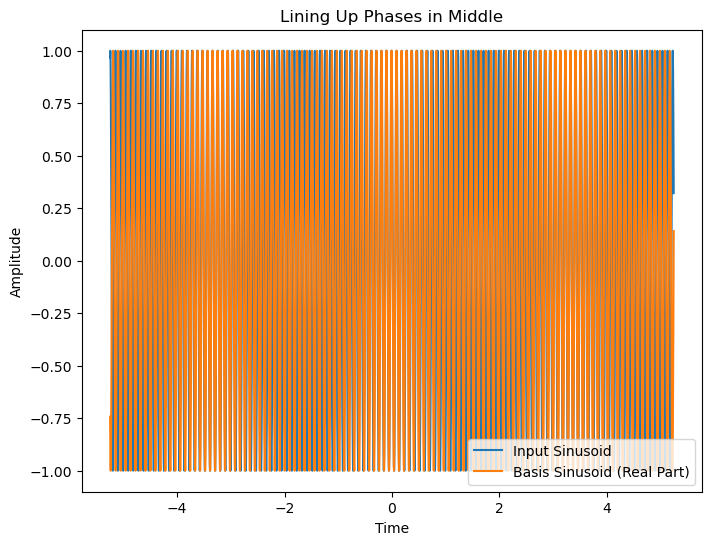

In [54]:
sr = 1000
t_max = 10.5
t = np.arange(0, t_max, 1/sr)
f0 = 10.5
eps = 0.3
basis_f = f0 + eps
phi = np.pi/6
x_in = np.cos(2*np.pi*f0*t + phi)
x_basis = np.cos(2*np.pi*basis_f*t + phi)

overlap_beginning = np.sum(x_in * x_basis) / len(t)


t_middle = np.arange(-t_max/2, t_max/2, 1/sr)
x_in_middle = np.cos(2*np.pi*f0*t_middle + phi)
x_basis_middle = np.cos(2*np.pi*basis_f*t_middle + phi)

overlap_middle = np.sum(x_in_middle * x_basis_middle) / len(t)

print(f"t_max = {t_max}")
print("Beginning Alignment Overlap: ", overlap_beginning)
print("Middle Alignment Overlap: ", overlap_middle)

if overlap_beginning > overlap_middle:
    print("The beginning alignement is better")
else:
    print("The middle alignment is better")
    
    
plt.figure(figsize=(16, 6))
plt.plot(t, x_in, label='Input Sinusoid')
plt.plot(t, x_basis, label='Basis Sinusoid (Real Part)')    
plt.title("Lining Up Phases at Beginning")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend(loc='lower right')
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(t_middle, x_in_middle, label='Input Sinusoid')
plt.plot(t_middle, x_basis_middle, label='Basis Sinusoid (Real Part)')    
plt.title("Lining Up Phases in Middle")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend(loc='lower right')
plt.show()
